# Idea:

An implimentation of user segmentation (clustering) on drivers.

A) Examine variable importance (drivers) of cluster membership.

    0. Brand trust & love:
        - Q_Brand_Trust_Drivers. Transparent in its actions 
        - Q_Brand_Trust_Drivers. Ethical 
        - Q_Brand_Trust_Drivers. Respectful 
        - Q_Brand_Trust_Drivers. Honest 
        - Q_BrandxLove.(agree or disagree) [BRAND] is a brand I love

    1. Loyalty metrics: \['qxadvocacy01_1',	'qxadvocacy02_1',	
    'qxretention_1',	'qxenrichment_1',	'qxbrandxlove_1',\]
        - Q_Advocacy01. likely to recommend  [MODEL] or another [BRAND] smartphone
        - Q_Advocacy02. likely to leave a positive online review for [MODEL]
        - Q_Retention.  likely to select [BRAND] the next time (smertphone) 
        - Q_Enrichment. likely to consider [BRAND] products (other electronic product)

    2. Usage variables: \[ 'qxtime',	
    'qxactivitiesxrecency_1 to qxactivitiesxrecency_25',	
    'qxcurrentxos',	'qxcurrentxstorage',	'qxcurrentxcarrier',	
    'qxunlocking',	'qxotherxdevices_1_1 to qxotherxdevices_9_6',	
    'qxpreviousxbrand',	'qxtransition_1',	'qxupgrade01_1 to qxupgrade01_9'\]
    
    3. Driver statements: \[ qxdrivers_1 to qxdrivers_34\]
    
    4. Total Quality Indicators	\[ qxoverallxqualityxindicators_1 to qxoverallxqualityxindicators_4\] : 
        - Q_Overall_Quality_Indicators. [Brand] is trustworthy 
        - Q_Overall_Quality_Indicators. When I use my [MODEL] , I feel good/positive 
        - Q_Overall_Quality_Indicators. My [MODEL]  meets my needs/ performs well 
        - Q_Overall_Quality_Indicators. My [MODEL]  is simple/easy to use 

B) Examine statistical significant differences in demographics amongst segments. 

    1. Demographic Columns \[ 'd1',	'd3_1',	'd3_2',	'd3_3',	'd3_4',	'd4', 'd6',	'd7_1',	'd7_2',	'd7_3',	'd7_4',	'd7_5',	'd7_97',	'd7_99',	'd7_97_other' \]
    -- convert d4[7] to dummy variable

C) Subsequently, we analyse difference between UX_index and UX_Loyalty for the clusters. We'll see a large difference in these two metrics for clusters which relationship between the quality indicators (feeling, trust, simplicity and function) and Loyalty differs. 

This will enable us to make infer things like:
Individuals who feel that ["Uing my [MODEL] doesn't require a lot of effort"] 


# Summary 

#### Brand Trust & Love Metrics
#### 3 clusters

### Important Features in Defining Cluster 2:

qxbrandxtrustxdrivers_4	Honest	(0.31970)	+4.325989

qxbrandxtrustxdrivers_2	Ethical (0.248561)	+4.299059

<br>

### statistically significant differences in demographics between groups 
**driven by Brand Love & Trust** are in whether or not an individual is currently employed or in school. If neither, then ther are less likely to bw in group 2 as opposed to group 1 or in group 0.

# Housekeeping

In [74]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline 


# Seaborn visualization library
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier

import scipy

In [6]:
pd.set_option('display.max_columns', 1000)
pd.options.display.max_rows=1000

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

plt.rcParams.update({'figure.max_open_warning': 0})


In [7]:
import random
random.seed( 0 )

# Load in Data

In [4]:
root = r"../data/input/07 Samsung UX Index - Web App Implementation/"

fname_data = root + r"Samsung UX Index Survey_Data.csv"
df_data = pd.read_csv(fname_data)

fname_vaxmap = root + r"Samsung UX Index Survey_Datamap.xlsx"
df_varmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=0)
df_valmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=1)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Modify d4 column

In [14]:
df_data['d4_X'] = np.where(df_data['d4']==7, '', df_data['d4'])
df_data['d4_7']  = np.where(df_data['d4']==7, df_data['d4'], '')

# Modify d1 column

In [ ]:
d1	1	Male
d1	2	Female
d1	3	Non-binary
d1	4	Would rather not say

In [90]:
df_data['d1_1'] = np.where(df_data['d1']==1, '', df_data['d1'])
df_data['d1_2']  = np.where(df_data['d1']==2, df_data['d1'], '')
df_data['d1_3'] = np.where(df_data['d1']==3, '', df_data['d1'])
df_data['d1_4']  = np.where(df_data['d1']==4, df_data['d1'], '')

# Brand trust & love

In [16]:
qx_list = df_data.columns
qx_list = [ x for x in qx_list if 'qxbrandx' in x ]
print(len(qx_list))
qx_list


5


['qxbrandxlove_1',
 'qxbrandxtrustxdrivers_1',
 'qxbrandxtrustxdrivers_2',
 'qxbrandxtrustxdrivers_3',
 'qxbrandxtrustxdrivers_4']

In [18]:
df_data_sub = df_data[qx_list]

In [19]:
# list non  integer columns  to be coerced into ints
coerce_cols = df_data_sub.dtypes[df_data_sub.dtypes!='int64'].index.to_list()
df_data_sub[coerce_cols] = df_data_sub[coerce_cols].apply(pd.to_numeric, errors='coerce')

In [20]:
# list all column types
print( np.unique( df_data_sub.columns))
print()
# confirm all are numeric types
print(np.unique(df_data_sub.dtypes.to_frame()[0].to_list()))
print()
print(df_data_sub.shape)
df_data_sub.describe()

['qxbrandxlove_1' 'qxbrandxtrustxdrivers_1' 'qxbrandxtrustxdrivers_2'
 'qxbrandxtrustxdrivers_3' 'qxbrandxtrustxdrivers_4']

[dtype('int64')]

(3254, 5)


,qxbrandxlove_1,qxbrandxtrustxdrivers_1,qxbrandxtrustxdrivers_2,qxbrandxtrustxdrivers_3,qxbrandxtrustxdrivers_4
count,3254.000000,3254.000000,3254.000000,3254.000000,3254.00000
mean,5.857714,5.143516,5.238168,5.470805,5.33067
std,1.230957,1.435141,1.394118,1.336743,1.37701
min,1.000000,1.000000,1.000000,1.000000,1.00000
25%,5.000000,4.000000,4.000000,5.000000,4.00000
50%,6.000000,5.000000,5.000000,6.000000,5.00000
75%,7.000000,6.000000,6.000000,7.000000,6.00000
max,7.000000,7.000000,7.000000,7.000000,7.00000


In [21]:
# Count Na values
df_data_sub.isna().sum()[df_data_sub.isna().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [22]:
# drop columns where are values are missing 
# qxactivitiesxdrivers_2_1
cols_allmissing = df_data_sub.isna().sum()[df_data_sub.isna().sum()==3254].index.to_list()
print(cols_allmissing)
print(df_data_sub.shape)
df_data_sub = df_data_sub.drop(cols_allmissing, axis = 1) 
print(df_data_sub.shape)

[]
(3254, 5)
(3254, 5)


In [23]:
# Standardize the qx_list columns
scaler = StandardScaler().fit(df_data_sub)
df_data_sub_std = df_data_sub.copy()
df_data_sub_std[df_data_sub.columns] = scaler.transform(df_data_sub)
df_data_sub_std.describe()

,qxbrandxlove_1,qxbrandxtrustxdrivers_1,qxbrandxtrustxdrivers_2,qxbrandxtrustxdrivers_3,qxbrandxtrustxdrivers_4
count,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03
mean,-2.096254e-16,-1.222815e-16,-6.114074e-17,3.319069e-16,-3.057037e-16
std,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00
min,-3.946898e+00,-2.887627e+00,-3.040502e+00,-3.345065e+00,-3.145464e+00
25%,-6.968933e-01,-7.969190e-01,-8.882738e-01,-3.522573e-01,-9.664957e-01
50%,1.156079e-01,-1.000164e-01,-1.708643e-01,3.959446e-01,-2.401731e-01
75%,9.281091e-01,5.968861e-01,5.465452e-01,1.144147e+00,4.861496e-01
max,9.281091e-01,1.293789e+00,1.263955e+00,1.144147e+00,1.212472e+00


In [24]:
# Count all Na values, now that they're scaled... 
# did scaling generate nans for columns with *some* missing values? NO
df_data_sub_std.isna().sum()[df_data_sub_std.isna().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [25]:
# fill NA's with 0
df_data_sub_std.fillna(0, inplace=True)

In [26]:
# Count Na values... should totall to 0 across the board
sum(df_data_sub_std.isna().sum()[df_data_sub.isna().sum()>0])

0

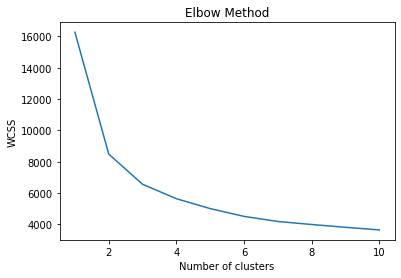

In [27]:
# Using WCSS-based (sum of dists b/w centroids & points for all clusters)...
# ... Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_data_sub_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# Fitting KMeans w/ Optimal number of Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_data_sub_std)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


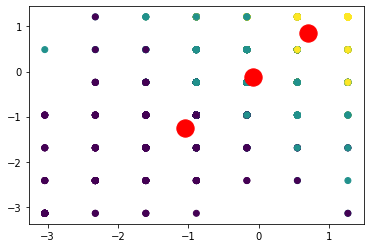

In [31]:
plt.scatter(df_data_sub_std.ix[:,2], df_data_sub_std.ix[:,4], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [32]:
df_data_sub_std['pred'] = pred_y
df_data_sub_std.groupby('pred').describe()

qxbrandxlove_1                                                                       qxbrandxtrustxdrivers_1                                                                       qxbrandxtrustxdrivers_2                                                                       qxbrandxtrustxdrivers_3                                                                       qxbrandxtrustxdrivers_4                                                                      
              count      mean       std       min       25%       50%       75%       max                   count      mean       std       min       25%       50%       75%       max                   count      mean       std       min       25%       50%       75%       max                   count      mean       std       min       25%       50%       75%       max                   count      mean       std       min       25%       50%       75%       max
pred                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
0             703.0 -1.055180  1.052202 -3.946898 -1.509395 -0.696893 -0.696893  0.928109                   703.0 -1.257886  0.751096 -2.887627 -1.493822 -0.796919 -0.796919  0.596886                   703.0 -1.256673  0.754091 -3.040502 -1.605683 -0.888274 -0.888274  1.263955                   703.0 -1.262233  0.793279 -3.345065 -1.848661 -1.100459 -1.100459  1.144147                   703.0 -1.283681  0.760161 -3.145464 -1.692818 -0.966496 -0.966496  1.212472
1            1328.0 -0.080787  0.790910 -3.134397 -0.696893  0.115608  0.928109  0.928109                  1328.0 -0.123631  0.601173 -2.887627 -0.274242 -0.100016 -0.100016  1.293789                  1328.0 -0.145474  0.593874 -3.040502 -0.170864 -0.170864  0.546545  1.263955                  1328.0 -0.122388  0.637262 -3.345065 -0.352257 -0.352257  0.395945  1.144147                  1328.0 -0.146648  0.582323 -3.145464 -0.240173 -0.240173  0.486150  1.212472
2            1223.0  0.694258  0.466416 -3.946898  0.928109  0.928109  0.928109  0.928109                  1223.0  0.857299  0.532790 -1.493822  0.596886  1.293789  1.293789  1.293789                  1223.0  0.880320  0.496066 -1.605683  0.546545  1.263955  1.263955  1.263955                  1223.0  0.858447  0.435851 -1.100459  0.395945  1.144147  1.144147  1.144147                  1223.0  0.897119  0.431078 -0.966496  0.486150  1.212472  1.212472  1.212472

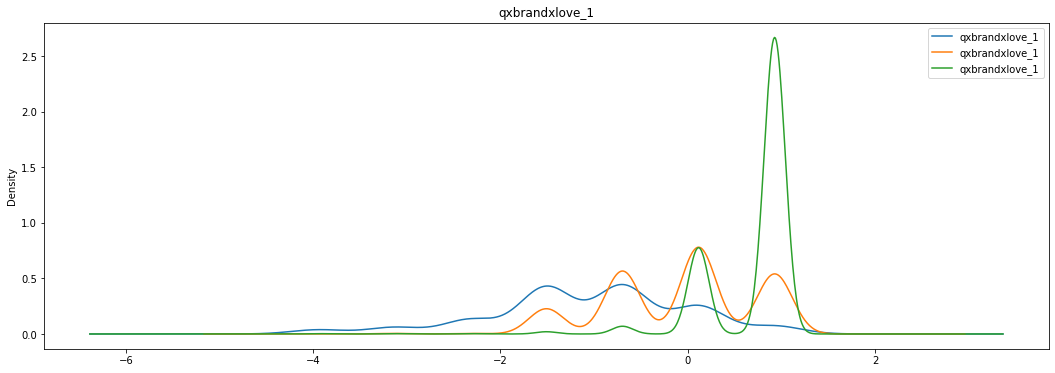

In [42]:
fig, ax = plt.subplots(figsize=(18,6))
  
for name, group in df_data_sub_std.groupby('pred'):
    group[qx_list[0]].plot( kind='kde', ax=ax, title=qx_list[0], legend=True)

plt.show()

# Save Each Plot to PDF 

LinAlgError: singular matrix

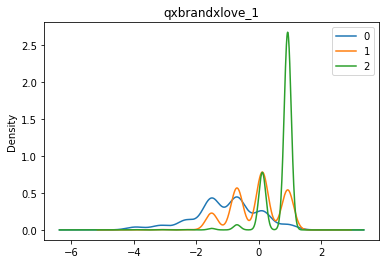

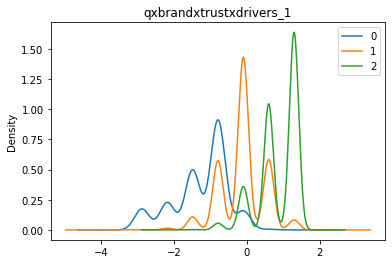

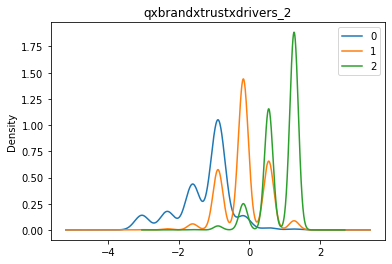

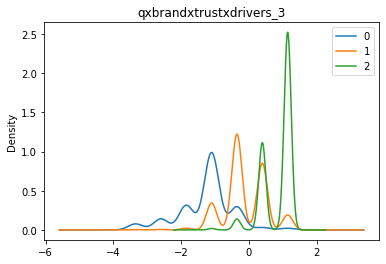

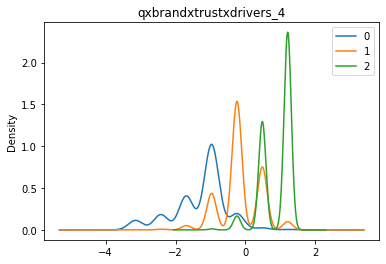

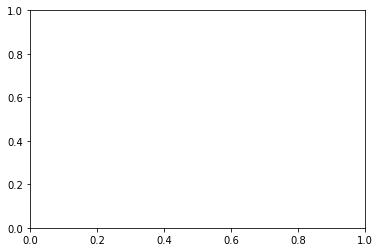

In [101]:
with PdfPages('../data/output/Seg1_KNN3_bybrandxlovextrust.pdf') as pdf:
    plt.ioff()
    for col in df_data_sub_std.columns.drop(['pred']):
        plt.figure()
        fig=df_data_sub_std.groupby('pred')[col].plot(kind='kde', title=col, legend=True)[0].get_figure()
        pdf.savefig(fig)


# Variable Importance - Cluster 2

In [53]:
df_data_sub_std['pred_2'] = np.where(df_data_sub_std['pred']==2, 1, 0)

df_data_sub_std_vars=df_data_sub_std.columns.values.tolist()

y = df_data_sub_std['pred_2']

X = df_data_sub_std
X = X.drop(columns=['pred','pred_2'])

## Logistic Regression

In [46]:
m = LogisticRegression()
m.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# The estimated coefficients will all be around 1:
coefs = pd.DataFrame(list(zip(X.columns, m.coef_[0])))
coefs.columns = ['Variable', 'coefficient']
coefs = coefs.sort_values(['coefficient'], ascending=False)
coefs = coefs.merge(df_varmap[['Variable', 'Label']], on='Variable', how='left')
coefs.head(20)

,Variable,coefficient,Label
0,qxbrandxtrustxdrivers_4,4.325989,"Q_Brand_Trust_Drivers. Honest - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND]."
1,qxbrandxtrustxdrivers_2,4.299059,"Q_Brand_Trust_Drivers. Ethical - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND]."
2,qxbrandxtrustxdrivers_1,4.221218,"Q_Brand_Trust_Drivers. Transparent in its actions - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND]."
3,qxbrandxtrustxdrivers_3,3.890965,"Q_Brand_Trust_Drivers. Respectful - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND]."
4,qxbrandxlove_1,3.477137,Q_BrandxLove. How much do you agree or disagree with the statement below? - [BRAND] is a brand I love


In [52]:
desc_df = df_data_sub_std.groupby('pred').describe()
desc_df = desc_df.unstack().reset_index()
desc_df.columns = ['Variable','Metric','pred','value']
desc_df.head()

,Variable,Metric,pred,value
0,qxbrandxlove_1,count,0,703.000000
1,qxbrandxlove_1,count,1,1328.000000
2,qxbrandxlove_1,count,2,1223.000000
3,qxbrandxlove_1,mean,0,-1.055180
4,qxbrandxlove_1,mean,1,-0.080787


## RFE

In [67]:
# Identifying top 2 variables our of 4
model = LogisticRegression()
rfe_model = RFE(model, 2)
rfe_fit = rfe_model.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(df_data_sub_std.columns[feature_list_index])

qxbrandxtrustxdrivers_2
qxbrandxtrustxdrivers_4


## Random Forest

In [77]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)
 
# Fitting the classifier
rfc.fit(X, y)
 
# Printing the name of each feature along with the gini value
for feature in zip(df_data_sub_std.columns, rfc.feature_importances_):
    print(feature)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('qxbrandxlove_1', 0.12324182746906745)
('qxbrandxtrustxdrivers_1', 0.1822979317980961)
('qxbrandxtrustxdrivers_2', 0.24856082277067842)
('qxbrandxtrustxdrivers_3', 0.12611919019199727)
('qxbrandxtrustxdrivers_4', 0.31978022777016074)


In [79]:
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.15)
sfm.fit(X, y)
 
# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(df_data_sub_std.columns[feature_list_index])

qxbrandxtrustxdrivers_1
qxbrandxtrustxdrivers_2
qxbrandxtrustxdrivers_4


## Extra Trees

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
 
# fit an Extra Trees model to the data
etc = ExtraTreesClassifier()
etc.fit(X, y)
 
# Finally selecting the most important features
sfm = SelectFromModel(etc, threshold=0.15)
sfm.fit(X, y)
 
# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(df_data_sub_std.columns[feature_list_index])
    
# getting the score by relative importance of each attribute
print(etc.feature_importances_)

qxbrandxlove_1
qxbrandxtrustxdrivers_1
qxbrandxtrustxdrivers_2
qxbrandxtrustxdrivers_3
qxbrandxtrustxdrivers_4
[0.1524565  0.18009331 0.18485288 0.15172226 0.33087505]


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [100]:
varimp = pd.DataFrame({'Variable':df_data_sub_std.columns.drop('pred').drop('pred_2'),
              'imp': list(rfc.feature_importances_)}).sort_values('imp', ascending=False)

varimp = varimp.merge(df_varmap[['Variable', 'Label']], 
                      on='Variable', how='left')


varimp = varimp.merge(coefs[['Variable','coefficient']], on='Variable', how='left')

varimp['imp_rank'] = varimp['imp'].rank(ascending=False)
varimp['coef_rank'] = [abs(x) for x in varimp['coefficient']]
varimp['coef_rank'] = varimp['coef_rank'].rank(ascending=False)

varimp = varimp[['Variable','Label','imp_rank','imp','coefficient','coef_rank']]

varimp[varimp.imp_rank<10].sort_values('coefficient',ascending=True)

,Variable,Label,imp_rank,imp,coefficient,coef_rank
4,qxbrandxlove_1,Q_BrandxLove. How much do you agree or disagree with the statement below? - [BRAND] is a brand I love,5.0,0.123242,3.477137,5.0
3,qxbrandxtrustxdrivers_3,"Q_Brand_Trust_Drivers. Respectful - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND].",4.0,0.126119,3.890965,4.0
2,qxbrandxtrustxdrivers_1,"Q_Brand_Trust_Drivers. Transparent in its actions - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND].",3.0,0.182298,4.221218,3.0
1,qxbrandxtrustxdrivers_2,"Q_Brand_Trust_Drivers. Ethical - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND].",2.0,0.248561,4.299059,2.0
0,qxbrandxtrustxdrivers_4,"Q_Brand_Trust_Drivers. Honest - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND].",1.0,0.319780,4.325989,1.0


# Examine statistical significant differences in demographics amongst segments. 

In [81]:
df_data['pred'] = pred_y

In [91]:
# get columns not in df_data_sub_std
att_cols = [ 'd1_1', 'd1_2', 'd1_3', 'd1_4', 
            'd3_1',	'd3_2',	'd3_3',	'd3_4',	'd4_X', 'd4_7', 'd6',
            'd7_1',	'd7_2',	'd7_3',	'd7_4',	'd7_5',	'd7_97',	'd7_99',
            'd7_97_other']
att_cols

['d1_1',
 'd1_2',
 'd1_3',
 'd1_4',
 'd3_1',
 'd3_2',
 'd3_3',
 'd3_4',
 'd4_X',
 'd4_7',
 'd6',
 'd7_1',
 'd7_2',
 'd7_3',
 'd7_4',
 'd7_5',
 'd7_97',
 'd7_99',
 'd7_97_other']

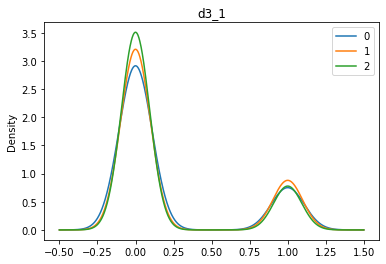

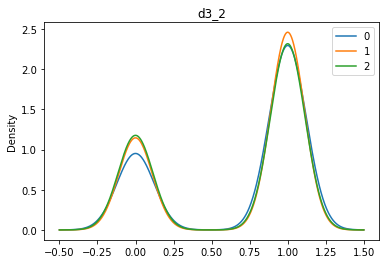

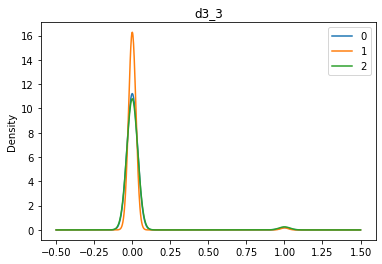

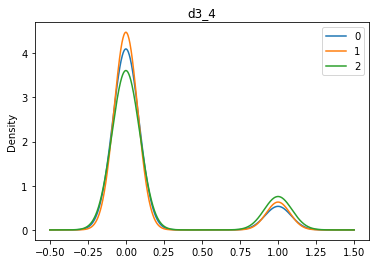

In [99]:
with PdfPages('../data/output/Seg1_KNN3_bybrandxlovextrust_demog.pdf') as pdf:
    plt.ioff()
    for col in att_cols:
        if pd.api.types.is_numeric_dtype(df_data[col]):
            plt.figure()
            fig=df_data.groupby('pred')[col].plot(kind='kde', title=col, legend=True)[0].get_figure()
            pdf.savefig(fig)


In [93]:
# Testing whether the populations have statistically sig diff in means (assuming N distr)
# For two independent samples w/ potentially !=  variance, use Welch's t-test

# scipy.stats.ttest_ind(cat1['values'], cat2['values'], equal_var=False)

t_test_results = {}
for col in att_cols:
    if pd.api.types.is_numeric_dtype(df_data[col]):
        g0 = df_data.where(df_data.pred==0).dropna()[col]
        g1 = df_data.where(df_data.pred==1).dropna()[col]
        g2 = df_data.where(df_data.pred==2).dropna()[col]
        
        t_test_results[col+"_01"] = scipy.stats.ttest_ind(g0,g1, equal_var=False)
        t_test_results[col+"_02"] = scipy.stats.ttest_ind(g0,g2, equal_var=False)
        t_test_results[col+"_12"] = scipy.stats.ttest_ind(g1,g2, equal_var=False)

In [94]:
results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
results_df.columns = ['statistic','pvalue']
results_df = results_df.sort_values('pvalue', ascending=True)

In [95]:
results_df.head(10)

,statistic,pvalue
d3_4_02,-3.660157,0.000260
d3_4_12,-3.390120,0.000710
d3_3_12,-2.287258,0.022278
d3_1_12,2.150810,0.031586
d3_2_02,2.016958,0.043880
d3_2_01,1.303072,0.192760
d3_1_02,1.249795,0.211587
d3_3_01,1.182267,0.237346
d3_2_12,0.870753,0.383973
d3_4_01,-0.753747,0.451123


In [96]:
results_df['Variable_Grp'] = results_df.index
results_df['Variable'] = results_df.Variable_Grp.replace("_01|_02|_12","", regex=True)
results_df_p01 = results_df[results_df.pvalue<=.01].merge(df_varmap[['Variable', 'Label']], 
                                         on='Variable', how='left')
results_df_p01

,statistic,pvalue,Variable_Grp,Variable,Label
0,-3.660157,0.00026,d3_4_02,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?
1,-3.390120,0.00071,d3_4_12,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?


In [97]:
# for our null Hypothesis: P1>=P2 (one tailed test) , use pvalue/2
results_df_p01['pvalue_1t'] = results_df_p01['pvalue']/2
results_df_p01
# reject if p/2 < alpha (.01)

,statistic,pvalue,Variable_Grp,Variable,Label,pvalue_1t
0,-3.660157,0.00026,d3_4_02,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?,0.000130
1,-3.390120,0.00071,d3_4_12,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?,0.000355


In [98]:
results_df_p01.to_csv('../data/output/Seg1_KNN3_bybrandxlovextrust_demog_statsig.csv', index=False)

### In summary,

The only statistically significant differences in demographics between groups driven by Brand Love & Trust are in whether or not an individual is currently employed or in school. If neither, then ther are less likely to bw in group 2 as opposed to group 1 or in group 0. 